In [63]:
# instalacija knjižnjic Python



""" 
%pip install datetime
%pip install seaborn
%pip installsklearn 
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install scikit-learn
%pip install seaborn
%pip install surprise
%pip install statsmodels
%pip install scipy"""




' \n%pip install datetime\n%pip install seaborn\n%pip installsklearn \n%pip install numpy\n%pip install matplotlib\n%pip install pandas\n%pip install scikit-learn\n%pip install seaborn\n%pip install surprise\n%pip install statsmodels\n%pip install scipy'

In [64]:
import numpy as np
import pandas as pd
import sklearn.cross_decomposition

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)
print(df.head())


   user_id  item_id  rating  timestamp
0        0       50       5  881250949
1        0      172       5  881250949
2        0      133       1  881250949
3      196      242       3  881250949
4      186      302       3  891717742


In [65]:
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()
df = pd.merge(df, movie_titles, on='item_id')
print(df.shape)
print(df.head())


(100003, 5)
   user_id  item_id  rating  timestamp                            title
0        0       50       5  881250949                 Star Wars (1977)
1        0      172       5  881250949  Empire Strikes Back, The (1980)
2        0      133       1  881250949        Gone with the Wind (1939)
3      196      242       3  881250949                     Kolya (1996)
4      186      302       3  891717742         L.A. Confidential (1997)


In [66]:
# Print the number of users
num_users = df['user_id'].nunique()
print(f"Number of users: {num_users}")

# Print the number of unique values in the dataframe
num_unique_values = df.nunique().sum()
print(f"Number of unique values in the dataframe: {num_unique_values}")

# Print the number of movies
num_movies = df['item_id'].nunique()
print(f"Number of movies: {num_movies}")




Number of users: 944
Number of unique values in the dataframe: 53577
Number of movies: 1682


In [67]:
# Sortiraj po vsoti ocen za uporabnika
sm = train_data_matrix.sum(axis = 1)
print(sm.shape)
sort_ind = np.argsort(-sm)
sm2 = sm[sort_ind]

# 
train_data_3 = train_data_2[sort_ind,:]
# 
train_data_4 = train_data_3[0:100,:]


(944,)


In [68]:
df1 = df.groupby('user_id')['user_id'].count()
df1.describe()


count    944.000000
mean     105.935381
std      100.933948
min        3.000000
25%       33.000000
50%       64.500000
75%      148.000000
max      737.000000
Name: user_id, dtype: float64

In [69]:
print(df1.values)

[  3 272  62  54  24 175 211 403  59  22 184 181  51 636  98 104 140  28
 277  20  48 179 128 151  68  78 107  25  79  34  43  36  41  24  20  25
  20  57 121  22  35  52 183 221 151  48  27  25  66 215  24  23  56  28
  65  21 187 106 154 382 208  21 232  93 200  80  38  30  34  65 131  38
 137  66  39  79  82  72  21  55  29  58 168 155  68 288  23 211  21  76
 300  98 388  20 400 278  56  63  27 136  59  67 216  29 111  23  64  22
  33 234 133  24  46  51  48  92 143  86  71 181  26  74  61  54  24 182
  45  23 184  30 353  30  22  26  25  55  35  47  51  24  21 107  33  20
 206 316  29  20  65  36  32 307 106  23  51  22  37  51 173 107 120  58
  42  23  63  30  20  69  69  37  22  28  27  43 177  38  63 115 273  42
  63 435  28  53 251  48  92  56 112 187  59  27  35 121 305  96  39 118
 181  40 216 386  20  43  42  22  64 230  33  33 132  37  25 126 128  93
 131  76  53  28  22 146 387 105 141  27  50  58  21  30 133  21  93 110
 480  94 124  48  29 159  24  23  20  81 238  22 19

In [70]:
#1.5
series_user_nratings = df.groupby('user_id')['user_id'].count()

ids_nratings_desc = series_user_nratings.sort_values(ascending=False)
ids_100_nratings = ids_nratings_desc.iloc[0:100]
print(ids_nratings_desc)
print(ids_100_nratings)

# Find the user with the most and the least data
user_most_data = series_user_nratings.idxmax()
user_least_data = series_user_nratings.idxmin()

# Print the index and values of the series
print("User with most data:", user_most_data, "Number of ratings:", series_user_nratings[user_most_data])
print("User with least data:", user_least_data, "Number of ratings:", series_user_nratings[user_least_data])


user_id
405    737
655    685
13     636
450    540
276    518
      ... 
558     20
34      20
36      20
926     20
0        3
Name: user_id, Length: 944, dtype: int64
user_id
405    737
655    685
13     636
450    540
276    518
      ... 
506    242
932    241
886    240
798    239
244    238
Name: user_id, Length: 100, dtype: int64
User with most data: 405 Number of ratings: 737
User with least data: 0 Number of ratings: 3


In [71]:
indeksi_df = df['user_id'].isin(ids_100_nratings.index)
# Nova serija podatkov
df5 = df.loc[indeksi_df].sort_values('user_id')
print(df5)


       user_id  item_id  rating  timestamp  \
47524        1      192       4  875072547   
56070        1       45       5  875241687   
17675        1      100       5  878543541   
15273        1       54       3  878543308   
30482        1      256       4  889751712   
...        ...      ...     ...        ...   
90937      932      600       2  891252412   
96793      932      523       4  891250080   
77751      932      218       3  891250915   
91378      932      148       2  891252140   
99838      932      416       3  891250498   

                                                   title  
47524                                 Raging Bull (1980)  
56070                         Eat Drink Man Woman (1994)  
17675                                       Fargo (1996)  
15273                                    Outbreak (1995)  
30482  When the Cats Away (Chacun cherche son chat) (...  
...                                                  ...  
90937              Daniel Defoe's 

In [72]:
#1.6
# Podatki so naši originalni podatki
train_data = df

n_users = train_data.user_id.nunique()
n_items = train_data.item_id.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Movies: '+ str(n_items))

Num. of Users: 944
Num of Movies: 1682


In [73]:
num_people = train_data_4.shape[0]
print(f"Number of people in train_data_4: {num_people}")


Number of people in train_data_4: 100


In [74]:
#2.1
ur_1 = train_data_4[1,:]
ur_2 = train_data_4[50,:]
print(ur_1)


[ 2.  3. nan ... nan nan nan]


In [75]:
#2.2
from scipy.stats import pearsonr

mask = ~np.isnan(ur_1) &  ~np.isnan(ur_2)  
if np.sum(mask) >= 2:
	corr, _ = pearsonr(ur_1[mask], ur_2[mask])
else:
	corr = np.nan

print(corr)


0.03210721559269311


In [76]:
#2.3

# Metoda za podobnost
def calcPearson(data_matr):
    pears = np.zeros([data_matr.shape[0],data_matr.shape[0]])
    for j in range(0, data_matr.shape[0]):
        for i in range(j, data_matr.shape[0]):
            pears[j,i] = np.nan;  # default value
            mask = ~np.isnan(data_matr[j,:]) & ~np.isnan(data_matr[i,:])
            if sum(mask) >= 2:
                pears[j,i], _ = pearsonr(data_matr[j,mask],data_matr[i,mask])
            pears[i,j] = pears[j,i]
        pears[j,j] = 0.0
    return pears


# Izracunaj pears_cor
pears_cor = calcPearson(train_data_4)

print(pears_cor)
print("Velikost: ",pears_cor.shape)


[[ 0.          0.19841011  0.22968366 ...  0.18835665  0.20816537
   0.25551185]
 [ 0.19841011  0.          0.10421103 ...  0.17698523 -0.03696457
   0.1732737 ]
 [ 0.22968366  0.10421103  0.         ...  0.1972609   0.03321634
   0.16781803]
 ...
 [ 0.18835665  0.17698523  0.1972609  ...  0.          0.21277649
   0.14222591]
 [ 0.20816537 -0.03696457  0.03321634 ...  0.21277649  0.
   0.34511434]
 [ 0.25551185  0.1732737   0.16781803 ...  0.14222591  0.34511434
   0.        ]]
Velikost:  (100, 100)


In [85]:
#3
# Postopek 

# Matrika podobnosti uporabnikov
user_similarity = np.copy(pears_cor)

# Povprecni rating vsakega uporabnika
mean_user_rating = np.nanmean(train_data_4, axis=1)
# Povpr rating kot stolpcni vektor
c3 = mean_user_rating[:, np.newaxis]

# Razlika rating - povprecje, vsebuje nan
ratings_diff = (train_data_4 - mean_user_rating[:, np.newaxis]) 
# Relativni ratnig, vsebuje 0 kjer ni ocene
rel_ratings = np.nan_to_num(ratings_diff)
print (rel_ratings)


[[ 0.13518519  0.13518519  0.13518519 ...  0.          0.
   0.        ]
 [-0.9080292   0.0919708   0.         ...  0.          0.
   0.        ]
 [-0.09748428 -0.09748428  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.96759259 -0.03240741  0.         ...  0.          0.
   0.        ]
 [ 0.          0.26609442  0.         ...  0.          0.
   0.        ]
 [ 0.3487395   0.          1.3487395  ...  0.          0.
   0.        ]]


In [ ]:
num_people = train_data_4.shape[0]
print(f"Number of people in train_data_4: {num_people}")


Number of people in train_data_4: 944


In [89]:
# Izracunaj napoved ocen filmov za izbranega uporabnika

# Izbrani ciljni uporabnik izmed 0 .. 100
user_id = 69

# Podobnost ostalih z izbranim uporabnikom 
usr1 = user_similarity[:, user_id]

usr_sim_ind = usr1 < 0.35

usr1[usr_sim_ind] = 0.0

# Kaj pomeni ?
c2 = usr1.dot(rel_ratings)


In [90]:
# Rezultat : ulomek - napoved relativne ocene za vse filme za enega uporabnika
c4 = c2 / np.array([np.abs(usr1).sum()]).T

# Napoved ocene filmov : pristejemo povprecno oceno uporabnika
povpr_ocena = mean_user_rating[user_id]
napoved_ocen = povpr_ocena + c4
print (napoved_ocen)


[4.03723479 2.87430734 3.3425197  ... 3.52727273 3.52727273 3.52727273]


In [91]:
# naredi Dataframe in vstavi dejansko oceno in njeno napoved
rezultat = pd.DataFrame(napoved_ocen, columns=['Napoved'])
rezultat['Ocena'] = train_data_4[user_id,:]
rezultat['Napaka napovedi'] = rezultat['Napoved']- rezultat['Ocena'] 

print(rezultat)


       Napoved  Ocena  Napaka napovedi
0     4.037235    4.0         0.037235
1     2.874307    2.0         0.874307
2     3.342520    2.0         1.342520
3     2.874307    4.0        -1.125693
4     3.342520    NaN              NaN
...        ...    ...              ...
1677  3.527273    NaN              NaN
1678  3.527273    NaN              NaN
1679  3.527273    NaN              NaN
1680  3.527273    NaN              NaN
1681  3.527273    NaN              NaN

[1682 rows x 3 columns]


RMSE napaka:  0.9237754160298097


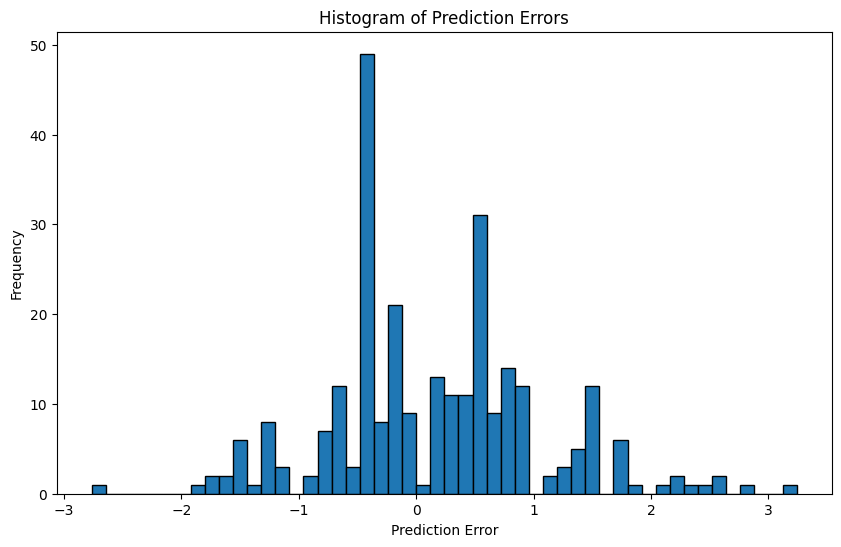

In [92]:
#3.1

povpr = np.nanmean(((rezultat['Napaka napovedi'].to_numpy()) **2 ))
rmse = np.sqrt(povpr)
print('RMSE napaka: ', rmse)
import matplotlib.pyplot as plt

# Plot histogram of prediction errors
plt.figure(figsize=(10, 6))
plt.hist(rezultat['Napaka napovedi'].dropna(), bins=50, edgecolor='k')
plt.title('Histogram of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

In [107]:
#4 
# Izbira uporabnikov: podobnost 
min_podobnost = 0.15
# Katerih ne upostevamo, premajhna podobnost
i1 = pears_cor[:,:] < min_podobnost

user_similarity = np.copy(pears_cor);
user_similarity[i1] = 0.0

# To so zdaj vsote abs vrednosti podobnih userjev za vsakega userja
c5 = np.array([np.abs(user_similarity).sum(axis = 0)]).T

# Kaj je to. Zgoraj ulomek, zmnozek relat.ocene in podobnosti
calc1 = user_similarity.dot(rel_ratings) 

# ulomek
calc2 = calc1 / c5

# napoved ocene : matrika za vse uporabnike in vse filme
calc3 = calc2 + c3

#print(calc3)
print ( user_similarity )


[[0.         0.19841011 0.22968366 ... 0.18835665 0.20816537 0.25551185]
 [0.19841011 0.         0.         ... 0.17698523 0.         0.1732737 ]
 [0.22968366 0.         0.         ... 0.1972609  0.         0.16781803]
 ...
 [0.18835665 0.17698523 0.1972609  ... 0.         0.21277649 0.        ]
 [0.20816537 0.         0.         ... 0.21277649 0.         0.34511434]
 [0.25551185 0.1732737  0.16781803 ... 0.         0.34511434 0.        ]]


In [110]:
#4.1

from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, ground_truth):
    """ Izracun RMSE napake za podane matrike

    Args:
        prediction (_type_): _description_
        ground_truth (_type_): _description_

    Returns:
        _type_: _description_
    """    ''''''
    ground_tr_2 = np.nan_to_num(ground_truth);
    prediction2 = np.nan_to_num(prediction);
    pred_valid = prediction2[:,0] > 0.0;

    # samo veljavne vrstice kjer pred ni nan
    prediction3 = prediction2[pred_valid,:]
    ground3 = ground_tr_2[pred_valid,:];
    
    prediction1 = prediction3[ground3.nonzero()].flatten() 
    ground_truth1 = ground3[ground3.nonzero()].flatten()

    return sqrt(mean_squared_error(prediction1, ground_truth1))


# Preizkusi in izpisi
# calc3 so napovedi, train so dejanske ocene

napaka = rmse(calc3, train_data_4)

print("RMSE napaka napovedi: ", napaka)


RMSE napaka napovedi:  0.9406619428671747


In [84]:
#4.3

# Metoda naj vrne matriko napovedanih ocen.

def predictRating (rating_data, user_similarity):
    """ Izracun napovedi ocen 
        Metoda naj vrne matriko napovedanih ocen.

    Args:
        rating_data (_type_): _description_
        user_similarity (_type_): _description_

    Returns:
        _type_: _description_
    """
    pred_rating = 0;
    # Povprecni rating uporabnika
    # Povpr rating kot stolpcni vektor
    # Razlika rating - povprecje, vsebuje nan
    # Relativni ratnig, vsebuje 0 kjer ni ocene
    
    return pred_rating
